<a href="https://colab.research.google.com/github/HYXDL/haikus-for-codespaces/blob/main/LENET5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#%%
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
rows, cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)
# convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
def build_lenet(input_shape):
  # sequentail API
  model = tf.keras.Sequential()
  # convolutional layer 1
  model.add(tf.keras.layers.Conv2D(filters=6, 
                                   kernel_size=(5, 5), 
                                   strides=(1, 1),
                                   activation='tanh', 
                                   input_shape=input_shape))
  # average pooling layer 1
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                             strides=(2, 2)))
  # convolutional layer 2
  model.add(tf.keras.layers.Conv2D(filters=16, 
                                   kernel_size=(5, 5), 
                                   strides=(1, 1), 
                                   activation='tanh'))
  # average pooling layer 2 
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                             strides=(2, 2)))
  model.add(tf.keras.layers.Flatten())
  # fully connected
  model.add(tf.keras.layers.Dense(units=120, 
                                   activation='tanh'))
  model.add(tf.keras.layers.Flatten())
  # fully connected
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
  # output layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=0.001,), 
              metrics=['accuracy'])
  
  return model
lenet = build_lenet(input_shape)
epochs = 10
# train the model
history = lenet.fit(x_train, y_train,
                           epochs=epochs, 
                           batch_size=128,
                           verbose=1)
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 0.3594 - accuracy: 0.8954
Epoch 2/10
469/469 [==============================] - 21s 46ms/step - loss: 0.1342 - accuracy: 0.9589
Epoch 3/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0870 - accuracy: 0.9735
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0645 - accuracy: 0.9805
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0512 - accuracy: 0.9839
Epoch 6/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0435 - accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 8/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0292 - accuracy: 0.9907
Epoch 9/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 0.0510 

(4, 10)


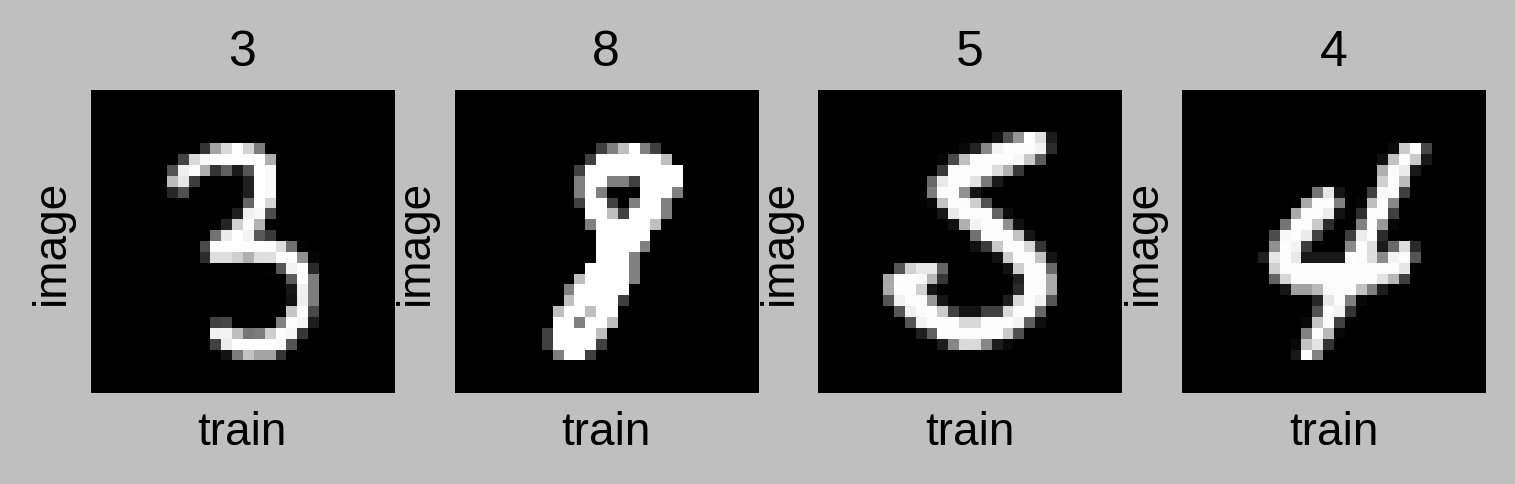

In [24]:
train_db=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(4).shuffle(123)
for batch_1 in train_db:
  batch=batch_1
  break
print(batch[1].shape)
bt=tf.squeeze(batch[0])
y=tf.argmax(batch[1],axis=1)
plt.figure(figsize=(6,6),dpi=300)
for i in range(bt.shape[0]):
  plt.subplot(1,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("train")
  plt.ylabel("image")
  plt.imshow(bt[i],)
  plt.title(int(y[i]))




In [ ]:
history.history['loss']

[0.35943037271499634,
 0.13423526287078857,
 0.08698402345180511,
 0.064458929002285,
 0.0512043833732605,
 0.04346586391329765,
 0.03554052487015724,
 0.029238341376185417,
 0.02428312972187996,
 0.021654464304447174]

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

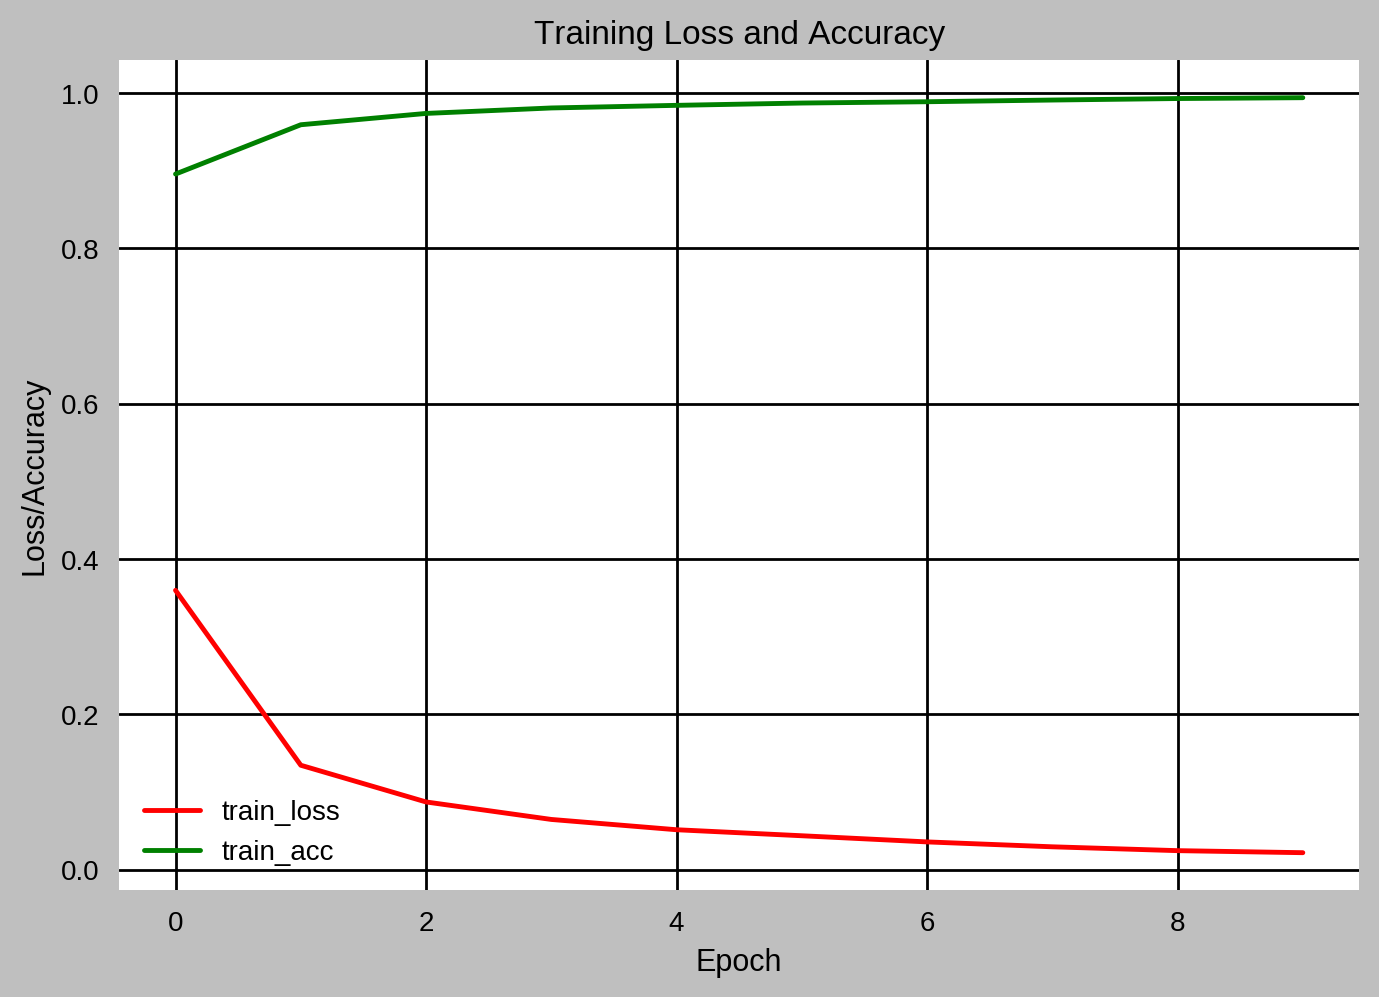

In [20]:
num_epochs = np.arange(0, 10)
plt.figure(dpi=200)
plt.style.use( 'grayscale')
plt.plot(num_epochs, history.history['loss'], label='train_loss', c='red')
plt.plot(num_epochs, history.history['accuracy'], label='train_acc', c='green')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()